# Предсказание цен на недвижимость

**Бизнес-постановка задачи** 

Компании по продаже недвижимости оценивают ее стоимость, используя методы машинного обучения. 
Задача оценки цены на недвижимость также может быть нужна для:
* выявления аномально низких цен на недвижимость,
* оценки макроэкономических показателей, 
* уточнения ставок по ипотеке

**Постановка задачи анализа данных** 

Целью данной задачи является прогнозирование стоимости домов в округе Кинг (штат Вашингтон, США) с помощью построения регрессионных моделей и их анализа. Набор данных состоит из цен на дома в округе Кинг, проданных в период с мая 2014 года по май 2015 года. Данные опубликованы в открытом доступе на платформе Kaggle. 

Данные с сайта renthub.com по стоимости квартир для аренды в Сиэтле:

<img src="price_Seattle.jpg" width="300" height="350" >

**Обзор доступных данных**

В выборке 21613 наблюдений и 21 переменная. 
Таким образом, про каждый из 21613 объектов недвижимости мы знаем значения 21 их характеристики (число спален, оценка состояния риелтором, наличие вида на воду и т.п.)

Выборка была разбита на две части для обучения и для тестирования модели. Данные на обучение и тест обычно делят случайно и равномерно: нужно чтобы и обучающая, и тестовая выборка были похожие на те данные, на которых модель будет использоваться в боевых условиях. 

Более сложные разбиения могут использоваться если в данных есть временная компонента - например, мы строим скоринговую модель и для теста откладываем данные за последние несколько месяцев, а всю остальную выборку используем для обучения. Такое разбиение имитирует реальную работу модели: мы можем обучаться только на данных прошлых кредитов, а работать модель уже будет на данных из будущего. 

Доли общей выборки для обучения и тестирования обычно 70% и 30% соотвественно. Любые разумные числа подходят, если для обучения используется достаточно много данных (обычно больше 50%), но и для тестирования что-то остается (10% и больше).


Данные содержат два типа переменных:

* Целевая: **Целевая. Цена**
* Остальные переменные: **20 переменных, могут использоваться для прогноза целевой переменной.**

## План анализа данных (data mining):

  1. Загрузить данные для обучения
  2. Обработать данные перед обучением модели
  3. Обучить модель на обучающей выборке
  4. Загрузить и предобработать данные для тестирования
  5. Провалидировать модель на тестовой выборке

## 1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки** 

Библиотека **warnings** отвечает за то, какие предупреждения (warnings) о работе будут выводиться пользователю. 
FutureWarning - предупреждения о том, как изменится работа библиотек в будущих версиях.
Поэтому такие предупреждения мы будем игнорировать.
Чтобы включить режим игнорирования мы отбираем все предупреждения из категории FutureWarning и выбираем для них действия 'ignore'.
Это делается вызовом функции simplefilter c задание двух атрибутов: действия action и категории предупреждений category.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Для корректной работы с данными в python требуется загрузить специальную библиотеку
**pandas**, программную библиотеку на языке python для обработки и анализа данных. 

In [2]:
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd

Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах. 

Оснвные методы для построения:
* plot() - графики
* semilogy() - график логарифметический
* hist() - гистограммы

In [3]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt

**Шаг 1.2. Загрузим данные**

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки pandas для загрузки таких данных **read_excel**.

В функции передаем один атрибут: название таблицы с данными.

In [4]:
training_data = pd.read_excel('training_data.xlsx') # загружаем таблицу в переменную training_data

*Что важно посмотреть после того, как мы загрузили данные?*
- проверить, что данные действительно загрузились
- посмотреть на данные, чтобы удостовериться, что они правильные: колонки имеют те же названия, что и в таблице и т.д.

Для того чтобы это сделать, нужно вызвать от переменной *training_data* метод **head()**, который выводит первые 5 строк таблицы. 

Для вызова метода объекта необходимо сначала написать *имя объекта*, затем поставить *точку*, затем уже написать *название метода*. Обратите внимание, что в конце обязательно ставить скобочки, потому что метод - это функция и в ней есть аргументы, просто в данном случае мы их не передаем, поэтому оставляем поле пустым

In [5]:
training_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


**Шаг 1.3. Посмотрим на размеры загруженной таблицы**, у которой мы видели только первые 5 строк.

Для этого вызываем поле **shape** у нашей переменной *training_data*. Поле вызывается также как метод, но в конце скобки не ставятся, так как для поля не предусмотрена передача аргументов.  

In [6]:
training_data.shape

(15129, 16)

*Что означает первое и второе число?*

Итак, таблица содержит 15129 строк (объектов) и 16 столбцов (признаков), включая выходной (целевой) признак.
Видими, что 15129 меньше 21613, так как мы пока загрузили только часть данных, которую будем использовать для обучения модели.

Таблицу проверили, теперь можно приступать к обработке данных.

# 2. Обработать данные перед обучением модели

**Шаг 2.1. Проверяем данные на наличие пропусков и типов переменных**

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно обратиться вызвать у переменной *training_data* метод **info()**.

Напомним, что в конце необходимо поставить скобочки.

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 16 columns):
Целевая.Цена           15129 non-null int64
Спальни                15129 non-null int64
Ванные                 15129 non-null float64
Жилая площадь          15129 non-null int64
Общая площадь          15129 non-null int64
Количество этажей      15129 non-null float64
Вид на воду            15129 non-null int64
Просмотрены ранее      15129 non-null int64
Состояние              15129 non-null int64
Оценка риелтора        15129 non-null int64
Площадь без подвала    15129 non-null int64
Площадь подвала        15129 non-null int64
Год постройки          15129 non-null int64
Год реновации          15129 non-null int64
Широта                 15129 non-null float64
Долгота                15129 non-null float64
dtypes: float64(4), int64(12)
memory usage: 1.8 MB


Анализируем результата выполнения команды:

* 15129 строк (entries)
* 16 столбцов (Data columns)

В данных присутствует всего два типа dtypes:
* int64 - целое число  (12 столбцов)
* float64 - дробное число (4 столбца)

Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Так как эти цифры в каждой строчке совпадают с числом строк (15129), то в данных нет пропусков и можно двигаться дальше. 

**Шаг 2.2. Работаем с целевой переменной**

*Какая переменная целевая?*

В данном случае по условию задачи мы должны прогнозировать стоимость, поэтому целевая переменная - это цена. 

In [8]:
target_variable_name = 'Целевая.Цена'

Нам нужно выделить в отдельную переменную *training_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *training_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*. 

In [9]:
training_values = training_data[target_variable_name]

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. 
Для это нужно у переменной *training_data* вызвать метод **drop()**. Результат мы записываем в новую переменную *training_points*. После выполнения запроса *training_points* будет содержать исходную таблицу без целевого столбца. 

Обратите внимание, что в данном случае мы передаем два аргумента:
    1. target_variable_name - название столбца цены, который мы ранее записали в эту переменную и теперь хотим удалить из training_data
    2. axis=1 - означает, что мы удаляем столбец, а в случае axis=0 - означает, что мы удаляем строку

In [10]:
training_points = training_data.drop(target_variable_name, axis=1)

Можно посмотреть результаты этих действий, вызвав метод **head()** и поле **shape**, которыми мы пользовались ранее, но сейчас нужно вызывать их от новой переменной *training_points*.

In [11]:
training_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [12]:
training_points.shape

(15129, 15)

Видно, что столбца действительно нет, а количество строк не изменилось. Данные в 5 первых строках такие же, как были ранее.

##   3. Обучить модель на обучающей выборке

**Шаг 3.1. Выбираем метод, который будем использовать**

Проще всего начать с простых методов. 
Мы воспользуемся двумя методами для построения моделей и сравним их между собой:
* Линейная регрессия *linear regression*
* Лес решающих деревьев *random forest*

На выбор метода для построения модели влияет набор признаков и размер выборки. А также понимание того, какая связь между входными переменными и целевой должна быть. Но часто решение принимается исходя из того, какая модель сработала лучше.

Для корректной работы с методами построения моделей в python требуется загрузить специальную библиотеку
**sklearn**, программную библиотеку на языке python для для машинного обучения и анализа данных.

На самом деле всю библиотеку загружать даже не нужно, нам достаточно импортировать два модуля из этой библиотеки:
 * *linear_model* - тут находятся все линейные модели, в том числе Линейная регрессия
 * *ensemble* - тут находятся модели на основе ансамблей, в том числе Лес решающих деревьев

In [13]:
from sklearn import linear_model, ensemble

C:\Users\Dmitry\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Прежде чем начать обучение моделей, нужно создать их прототипы. 
Чтобы создать прототип модели линейной регресии, пишем имя модуля 'linear_model', затем точку, затем название модели.

Получается такой код:

```python
linear_regression_model = linear_model.LinearRegression()
linear_regression_model
```

Результат выполнения должен быть следующим:

```python
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
```

In [14]:
linear_regression_model = linear_model.LinearRegression() # создаем прототип модели

In [15]:
linear_regression_model # смотрим, что получилось

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Давайте разберемся что значат эти параметры.

**copy_X : boolean, optional, default True**
Если True, X будет скопирован; или будет перезаписан.

**fit_intercept : boolean, optional, default True**
следует ли рассчитывать пересечение для этой модели. Если установлено значение False, то пересечение не будет использоваться в расчетах (например, ожидается, что данные уже центрированы).

**normalize : boolean, optional, default False**
Этот параметр игнорируется, если для fit_intercept задано значение False. Если True, X будут нормализованы до регрессии путем вычитания среднего значения и деления на норму. Если вы хотите стандартизировать, используйте sklearn.preprocessing.StandardScaler, прежде чем вызывать fit с помощью normalize = False.

**n_jobs : int or None, optional (default=None)**
Количество заданий, используемых для расчета. Это обеспечит ускорение только для n_targets> 1. None означает 1, если только в контексте joblib.parallel_backend. -1 означает использование всех процессоров. 

Больше информации о параметрах: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Чтобы создать прототип модели случайного леса, пишем имя модуля ensemble, затем точку, затем название модели. 

Получается такой код:

```python
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model
```
Результат выполнения должен быть следующим:
    
```python
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
```

In [16]:
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

У модели на основе случайного леса больше параметров. Рассмотрим наиболее важные:
* параметр **n_estimators** определяет, сколько деревьев в лесу,
* в параметре **max_depth** устанавливается, какая максимальная глубина у дерева,
* в параметре **min_samples_leaf** задается, какое максимальное число объектов может попасть в лист дерева.

Больше информации о параметрах: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Так как у модели на основе случайного решающего леса больше параметров, такая модель обычно обучается медленнее.
Кроме этого, на время обучения влияют значения параметров модели. Например, чем больше деревьев в лесе - тем дольше модель будет учиться.

**Шаг 3.2. Обучить модель**

Теперь, когда мы создали прототипы обеих моделей, можем их обучить с помощью обучающей выборки. 

Для этого вызываем метод **fit()** у каждой модели и передаем ему на вход два аргумента: 
таблицу входных признаков и столбец значений целевой переменной - (training_points, training_values)

In [17]:
linear_regression_model.fit(training_points, training_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Делаем тоже самое для модели решающего леса.

In [18]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

* Для двух разных моделей в sklearn методы для обучения модели не отличаются.
* Мы получили две обученные модели. 
* Теперь необходимо провалидировать модели на новых тестовых данных. 

## 4. Загрузить и предобработать данные для тестирования

**Шаг 4.1. Загрузим и проанализируем тестовые данные.**

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки pandas для загрузки таких данных **read_excel**.

В функции передаем один атрибут: название файла, в котором находится таблица с данными.

In [19]:
test_data = pd.read_excel('test_data.xlsx')

*Что важно посмотреть, после того, как мы загрузили данные?*

- проверить, что данные действительно загрузились
- посмотреть на данные, чтобы удостовериться, что они правильные: колонки имеют те же названия, что и в таблице и т.д.

Для того чтобы это сделать, нужно вызвать от переменной *test_data* метод **head()**, который выводит первые 5 строк таблицы. 

Для вызова метода объекта необходимо сначала написать *имя объекта*, затем поставить *точку*, затем уже написать *название метода*. Обратите внимание, что в конце обязательно ставить скобочки, потому что метод - это функция и в ней есть аргументы, просто в данном случае мы их не передаем, поэтому оставляем поле пустым

In [20]:
test_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


Посмотрим на размеры загруженной таблицы, так как мы видели только 5 строк

Для этого вызываем поле **shape** у нашей переменной *test_data*. Поле вызывается также как метод, но в конце скобки не ставятся (!), так как для поля не предусмотрена передача аргументов.  

In [21]:
test_data.shape

(6484, 16)

*Что означает первое и второе число?* 
Таблица содержит 6484 строк (объектов) и 16 столбцов (признаков), включая выходной (целевой) признак. Также как в учебных данных до обучения.

Таблицу проверили, теперь можно приступать к обработке данных
Действуем аналогично тому, как делали с данными для обучения

Проверим, есть ли в данных пропуски. Для того чтобы это сделать, нужно обратиться вызвать у переменной *test_data* метод **info()**.

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 16 columns):
Целевая.Цена           6484 non-null int64
Спальни                6484 non-null int64
Ванные                 6484 non-null float64
Жилая площадь          6484 non-null int64
Общая площадь          6484 non-null int64
Количество этажей      6484 non-null float64
Вид на воду            6484 non-null int64
Просмотрены ранее      6484 non-null int64
Состояние              6484 non-null int64
Оценка риелтора        6484 non-null int64
Площадь без подвала    6484 non-null int64
Площадь подвала        6484 non-null int64
Год постройки          6484 non-null int64
Год реновации          6484 non-null int64
Широта                 6484 non-null float64
Долгота                6484 non-null float64
dtypes: float64(4), int64(12)
memory usage: 810.6 KB


Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Так как эти цифры в каждой строчке совпадают с числом строк (6484), то в данных нет пропусков.

**Шаг 4.2. Отделяем целевую переменную**

Нам нужно выделить в отдельную переменную *test_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *test_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*. 

In [23]:
test_values = test_data[target_variable_name]

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. 
Для это нужно у переменной *test_data* вызвать метод **drop()**. Результат мы записываем в новую переменную *test_points*. После выполнения запроса *test_points* будет содержать исходную таблицу без целевого столбца. 

Обратите внимание, что в данном случае мы передаем два аргумента:
    1. target_variable_name - название столбца цены, который мы ранее записали в эту переменную и теперь хотим удалить из training_data
    2. axis=1 - означает, что мы удаляем столбец, а в случае axis=0 - означает, что мы удаляем строку

In [24]:
test_points = test_data.drop(target_variable_name, axis=1)

И проверяем результат записанный в test_points

In [25]:
test_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [26]:
test_points.shape

(6484, 15)

Видно, что количество столбцов уменьшилось на один. Данные в 5 первых строках такие же, как были ранее.

# 5. Провалидировать модель на тестовой выборке

**Шаг 5.1. Сравнение моделей.**

Теперь мы готовы сравнить качество двух моделей! 😎

*1. Какая модель лучше?*

Получим прогнозы целевой переменной на тестовых данных для модели линейной регрессии м модели случайного леса. 

Для этого вызовем у каждой модели метод **predict()**, в качестве аргумента передадим *test_points*.

In [27]:
test_predictions_linear = linear_regression_model.predict(test_points)

In [28]:
test_predictions_random_forest = random_forest_model.predict(test_points)

Качество регрессионных моделей оценим двумя способами: 
1. Сравним визуально прогнозы с настоящими ценами (тестовые с предсказанием)
2. Сравним метрики качества

Визуализируем прогноз линейной модели и настоящие значения из тестовой выборки

In [29]:
%matplotlib inline 

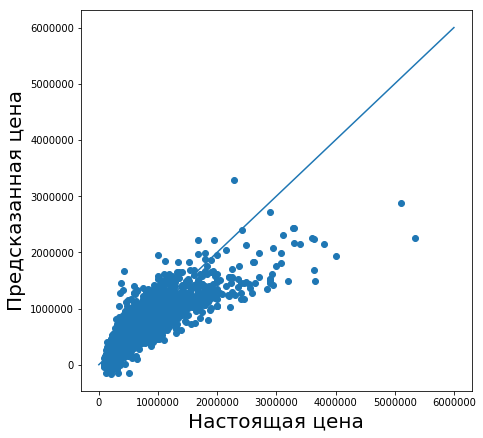

In [30]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Визуализируем прогноз модели случайного леса и настоящие значения из тестовой выборки

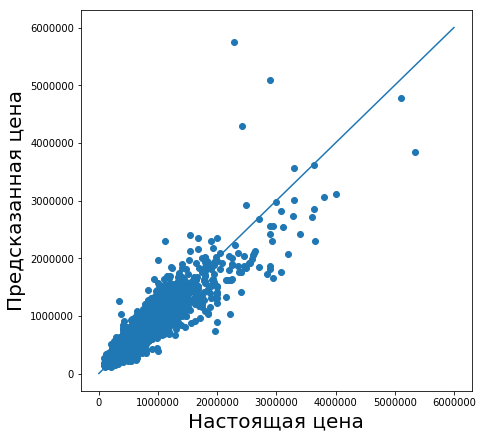

In [31]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest)
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Кажется, что лучше сработала модель случайного леса, так как точки на втором изображении расположены вдоль диагонали. На первом изображении видно, что для высоких настоящих цен модель линейной регрессии дает существенно заниженный результат. 

Проверим, так ли это с помощью **метрик качества регрессионной модели**

Для корректного подсчета метрик качества модели в python требуется загрузить их из библиотеки **sklearn**. 

Мы используем две метрики качества:
 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Подсчитаем ошибки для линейной модели.

Для этого вызовем методы **mean_absolute_error()** и **mean_squared_error()**. На вход им передается столбец настоящих значений *test_values* и столбец значений, предсказанных моделью линейной регрессии *test_predictions_linear*.

In [33]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

Подсчитаем ошибки для модели случайного леса.

Для этого вызовем методы **mean_absolute_error()** и **mean_squared_error()**. На вход им передается столбец настоящих значений *test_values* и столбец значений, предсказанных моделью линейной регрессии *test_predictions_random_forest*.

In [34]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)

Теперь напечатаем полученные ошибки.

Из средней квадратичной ошибки нужно взять корень

Используем еще одну библиотеку для математических функций и работы многомерными массивами - ***NumPy***.

In [35]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model, 
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model, 
       np.sqrt (mean_squared_error_random_forest_model)))

MAE: 126852.51, RMSE: 201883.24 для модели линейной регрессии
MAE: 74870.62, RMSE: 142024.97 для модели случайного леса


Модель случайного леса работает лучше не только визуально, но и на основании результатов абсолютной и средне квадратичной ошибки, которые меньше для модели случайного леса.

# Обзор результатов

В этом ноутбуке мы научились 
0. Загружать библиотеки, необходимые для работы.
1. Загрузить данные для обучения, представленные в формате excel таблицы.
2. Проводить предрватилельную обработку данных перед построением и использованием модели машинного обучения: смотреть на части таблицы, понимать, какой размер у выборки данных, выделять отдельные столбцы таблицы в новые таблицы.
3. Обучать модель линейной регрессии и решающего леса на обучающей выборке.
4. Валидировать модель на тестовой выборке с помощью кросс-плота для модели и реальных значений, стандартных ошибок модели.

## 6. Бонус: Выявление важных признаков

Признаки, используемые для обучения модели, оказывают большое влияние на качество результатов. Неинформативные или слабо информативные признаки могут снизить качество модели, использование избыточных признаков в модели замедляет скорость ее работы.

Для того, чтобы отобрать признаки нам следует ответить на следующие вопросы: 
    1. Все ли признаки в наших данных заполненны разумными значениями?
    2. Какие признаки будут больше всего влиять на значение целевой переменной?
    3*. Какие дополнительные признаки имело бы смысл добавить в список входных?

**6.1. Разглядывание значений признаков**

Для того чтобы ответить на первый вопрос, нам необходимо получить некоторую нашу экспертную оценку данных. В наших данных нет пропусков, однако иногда пропуски предварительно заполняют другими значениями (0, 999 и другие) и их можно увидеть, только внимательно посмотрев на данные. 

Для того, чтобы это сделать, нужно вызвать у переменной *training_points* метод **head(10)**, который выводит первые 10 строк таблицы.

In [36]:
training_points.head(10)

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407
5,3,2.25,2300,9914,2.0,0,0,4,8,2300,0,1980,0,47.5677,-122.086
6,3,2.50,2770,8820,1.0,0,0,3,7,1900,870,1980,2004,47.3685,-122.048
7,2,1.75,1650,7500,1.0,0,0,4,7,1000,650,1959,0,47.6871,-122.207
8,1,1.00,580,1799,1.0,0,0,3,7,580,0,1908,2005,47.6829,-122.375
9,2,1.00,900,3400,1.0,0,0,5,6,900,0,1905,0,47.5269,-122.314


Рассмотрим столбец "Год реновации". Он содержит много нулей и мало реальных данных о годах, что как раз свидетельствует о том, что в этих данных изначально были пропуски, а к нам они попали уже заполненные нулями. 

Мы можем посмотреть количество уникальных значений и сколько раз эти значения встречаются в этом столбце. Для этого вызываем метод **value_counts()** у нашего столбца *training_points['Год реновации']*

In [37]:
training_points['Год реновации'].value_counts()

0       14490
2014       63
2013       31
2000       28
2003       24
2007       23
2005       22
2006       19
2004       17
2009       17
1991       16
1989       16
2008       15
2001       15
1998       14
1995       14
2002       14
1999       13
1987       13
1993       13
1983       13
1990       13
1986       12
1988       12
1985       12
1994       11
1992       11
2015       11
1984       10
1996       10
        ...  
1965        5
1979        5
1958        5
1975        4
1977        4
1978        4
1970        4
1973        4
1981        3
1976        3
1945        3
1969        3
1974        2
1960        2
1964        2
1956        2
1957        2
1971        2
1963        2
1972        2
1940        2
1950        1
1953        1
1934        1
1946        1
1959        1
1948        1
1954        1
1962        1
1955        1
Name: Год реновации, Length: 67, dtype: int64

Как видно, нулей существенно больше (14490), чем любых других значений (639), поэтому можем сделать вывод, что этот признак не информативен и может негативно повлиять на качество модели.

**6.2. Какие признаки самые важные**

Ручной перебор признаков невозможен, если их тысячи, кроме того, часто даже эксперты не могут сказать, использование каких признаков в модели даст прирост качества.
Кроме ручного перебора всех признаков и их визуального анализа, можно использовать оценку значимости признаков с помощью обученных моделей. 

In [38]:
# на всякий случай переобучим модель, так как оценить значимость признаков можно только у уже обученной модели
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Получить оценку важности признаков можно вызвав поле **feature\_importances\_** у модели *random\_forest\_model*. 

In [39]:
random_forest_model.feature_importances_

array([0.00359204, 0.01198224, 0.29431741, 0.02425839, 0.0027096 ,
       0.02728388, 0.01344374, 0.00341878, 0.30319281, 0.02343902,
       0.00631403, 0.02684678, 0.00228705, 0.17871685, 0.07819737])

Набор цифр, которые мы получили выше, соответствует признакам, на которых мы обучали модель. Посмотреть эти признаки можно, вызвав у *training_points* метод **keys()**

In [40]:
training_points.keys()

Index(['Спальни', 'Ванные', 'Жилая площадь', 'Общая площадь',
       'Количество этажей', 'Вид на воду', 'Просмотрены ранее', 'Состояние',
       'Оценка риелтора', 'Площадь без подвала', 'Площадь подвала',
       'Год постройки', 'Год реновации', 'Широта', 'Долгота'],
      dtype='object')

Представим полученные результаты в более удобном табличном виде. Создадим пустую таблицу *feature_importance* с двумя колонками "Название признака", "Важность признака". Для этого воспользуемся функцией **DataFrame()** из библиотеки pandas и передадим ей в качестве аргумента   
*columns = ["Название признака", "Важность признака"]*

In [41]:
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])

Заполним соответствующие колонки значениями, которые мы получили выше. 

In [42]:
feature_importance['Название признака'] = training_points.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_

In [43]:
# выведем полученную таблицу
feature_importance

,Название признака,Важность признака
0,Спальни,0.003592
1,Ванные,0.011982
2,Жилая площадь,0.294317
3,Общая площадь,0.024258
4,Количество этажей,0.002710
5,Вид на воду,0.027284
6,Просмотрены ранее,0.013444
7,Состояние,0.003419
8,Оценка риелтора,0.303193
9,Площадь без подвала,0.023439


Мы можем отсортировать значения по важности, вызвав у *feature_importance* метод **sort_values()**.

Обратите внимание, что в данном случае мы передаем два аргумента:

1. by='Важность признака' - название столбца, по которому мы сортируем
2. ascending=False - означает, что мы сортируем по убиыванию, а в случае ascending=True сортировка будет по возростанию

In [44]:
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
8,Оценка риелтора,0.303193
2,Жилая площадь,0.294317
13,Широта,0.178717
14,Долгота,0.078197
5,Вид на воду,0.027284
11,Год постройки,0.026847
3,Общая площадь,0.024258
9,Площадь без подвала,0.023439
6,Просмотрены ранее,0.013444
1,Ванные,0.011982


Как видно, наиболее значимые признаки - это 
* Жилая площадь 
* Оценка риелтора
* Широта. 

Наименее важны такие признаки, как 
* Количество этажей
* Год реновации
* Состояние
* Спальни
* Площадь подвала 

Посмотрим на наиболее значимые признаки. Размер жилой площади квартиры (признак Жилая площадь) очевидным образом влияет на цену: чем больше площадь, тем квартира дороже. Важность оценки состояния квартиры риелтором (признак Оценка риелтора), также понятна. Интересно появление признака Широта в списке наиболее важных. Давайте посмотрим на карту округа Кинг.   

![title](map_King_county.jpg)

На карте видно, что центр Сиэтла находится в верхней половине карты. Соответственно, чем ближе к нему, тем дороже будет квартира. 